# Let's understand the rate of return formula from David

The goal is to make the rate of return for rent vs sale lines cross at some parameter point. Let's see: 


$$RoR\; =\; v\; =\; \frac{V}{D}\; =\frac{\delta \left( 1+\dot{p}-\left( 1+r \right)m \right)+\rho -\kappa -t}{1-m}$$

Where the variables are: 

variable | meaning 
-------- | ---
$\delta$ | Sujbective discount factor
$\dot{p}$ | Expected rate of price increase 
$r$ | Interest rate on mortgages 
$m$ | Mortgage as share of price 
$\rho$ | Rent as share of price
$\kappa$ | Operating costs as share of price 
$t$ | taxes (vacancy, property, etc...)

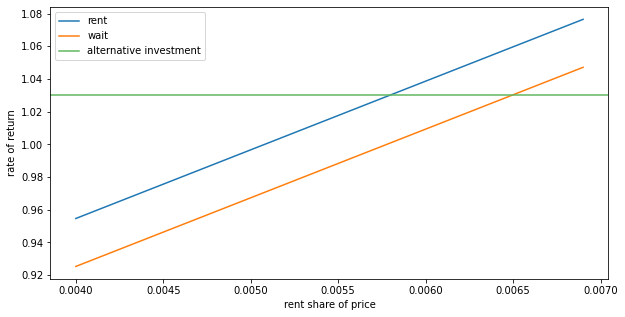

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 5]
pd.set_option('display.max_rows', 100)

def rate_of_return_rent(discount, price_0, price_t, interest_rate, mortgage_sop, rent, operating_cost_sop, taxes):
    price_increase = (price_t-price_0)/price_0
    interest_paid = (1+interest_rate)*mortgage_sop
    year_rent = rent*12
    year_operating = operating_cost_sop*12
    v = (discount*(1 + price_increase - interest_paid) + year_rent/price_0 - year_operating - taxes) / (1-mortgage_sop)
    return v

discount = 0.8
price_0 = 3e5
price_t = price_0*(1 + .05)
interest_rate = 0.05
mortgage_sop = 0.7
rent_sop = 0.004#25
operating_cost_sop = 0.0005
rent_tax = 0.01
sale_tax = 0.01
vacancy_tax = 0.02

df = pd.DataFrame()

for i in range(30):
    r = interest_rate # + i*1e-3
    rent_sop_plus = rent_sop + i*1e-4
    rent_plus = price_t * (rent_sop_plus)
    operating_sop_plus = operating_cost_sop 
    ror_sale = rate_of_return_rent(*[discount, price_0, price_t, r, mortgage_sop, 0, 0, sale_tax])
    ror_rent = rate_of_return_rent(*[discount, price_0, price_t, r, mortgage_sop, rent_plus, operating_sop_plus, rent_tax])
    ror_wait = rate_of_return_rent(*[discount, price_0, price_t, r, mortgage_sop, rent_plus, operating_sop_plus*0.8, vacancy_tax])
    results = dict(
    discount = discount,
    price_0 = price_0,
    price_t = price_t,
    interest_rate = r,
    mortgage_sop = mortgage_sop,
    rent = rent_plus,
    rent_sop = rent_sop_plus,
    operating_cost_sop = operating_cost_sop,
    rent_tax = rent_tax,
    sale_tax = sale_tax,
    vacancy_tax = vacancy_tax,
    ror_rent = ror_rent,
    ror_sale = ror_sale,
    ror_wait = ror_wait
    )
    df = df.append(results, ignore_index=True)
    
df['ror rent - ror sale'] = df['ror_rent'] - df['ror_sale']

fig, axs = plt.subplots()
axs = [axs]
axs[0].set(xlabel='rent share of price')
axs[0].set(ylabel='rate of return')
axs[0].plot(df['rent_sop'], df['ror_rent'],  label='rent')
axs[0].plot(df['rent_sop'], df['ror_wait'], label='wait')
#axs[0].plot(df['rent_sop'], df['ror_sale'], label='sale')
axs[0].axhline(y=1.03, label='alternative investment', c='#60b760')
axs[0].legend()

#axs[1].set(xlabel='interest rate')
#axs[1].set(ylabel='rate of return')
#axs[1].plot(df['interest_rate'], df['ror_rent'],  label='rent')
#axs[1].plot(df['interest_rate'], df['ror_wait'], label='wait')
#axs[1].plot(df['interest_rate'], df['ror_sale'], label='sale')


In [25]:
df['rent'] = df['rent_sop'] *  df['price_t'] 
df.head()
n = rate_of_return_rent(1, 3e5, 3.5e5, 0, 0, 0, 0, 0)
print(n)

1.1666666666666667


In [26]:
c = pd.DataFrame()

c['ror rent'] = df['ror_rent']
c['ror sell'] = df['ror_sale']
c['ror wait'] = df['ror_rent']

c['alt'] = 1.1

#def decision(r):
#    if r['ror rent'] > r['alt'] and r['ror rent'] > r['alt']:

def decision(v_rent, v_wait, alt): 
    if v_wait > alt:
        return 'wait'
    elif v_wait > alt and v_rent < alt:
        return 'rent'
    elif v_rent < alt:
        return 'sell'
    else:
        return 'undecided'
    
    
def decision_(r): 
    if r['ror wait'] >= r['alt']:
        return 'wait'
    elif r['ror wait'] < r['alt'] >= r['ror rent']:
        return 'rent'
    elif r['ror rent'] <= r['alt']:
        return 'sell'
    else:
        return 'undecided'
    
c['decision'] = c.apply(decision_, axis=1)
    

#df['decision'] = decision(c['ror rent'], c['ror wait'], c['alt'])
c.head(100)

ror rent  ror sell  ror wait  alt decision
0    1.16320      1.06   1.16320  1.1     wait
1    1.16608      1.06   1.16608  1.1     wait
2    1.16896      1.06   1.16896  1.1     wait
3    1.17184      1.06   1.17184  1.1     wait
4    1.17472      1.06   1.17472  1.1     wait
5    1.17760      1.06   1.17760  1.1     wait
6    1.18048      1.06   1.18048  1.1     wait
7    1.18336      1.06   1.18336  1.1     wait
8    1.18624      1.06   1.18624  1.1     wait
9    1.18912      1.06   1.18912  1.1     wait
10   1.19200      1.06   1.19200  1.1     wait
11   1.19488      1.06   1.19488  1.1     wait
12   1.19776      1.06   1.19776  1.1     wait
13   1.20064      1.06   1.20064  1.1     wait
14   1.20352      1.06   1.20352  1.1     wait
15   1.20640      1.06   1.20640  1.1     wait
16   1.20928      1.06   1.20928  1.1     wait
17   1.21216      1.06   1.21216  1.1     wait
18   1.21504      1.06   1.21504  1.1     wait
19   1.21792      1.06   1.21792  1.1     wait
20   1.22080      1.06   1.22080  1.1     wait
21   1.22368      1.06   1.22368  1.1     wait
22   1.22656      1.06   1.22656  1.1     wait
23   1.22944      1.06   1.22944  1.1     wait
24   1.23232      1.06   1.23232  1.1     wait
25   1.23520      1.06   1.23520  1.1     wait
26   1.23808      1.06   1.23808  1.1     wait
27   1.24096      1.06   1.24096  1.1     wait
28   1.24384      1.06   1.24384  1.1     wait
29   1.24672      1.06   1.24672  1.1     wait

In [4]:
import math

def choice(v_a, v_b, phi):
    return (1+(math.e)**(phi*(v_b - v_a)))**(-1)


df_ = pd.DataFrame()
phi = 0
df_['rent_vs_sell'] = choice(df['ror_rent'], df['ror_sale'], phi)
df_['sell_vs_rent'] = choice(df['ror_sale'], df['ror_rent'], phi)
#df_['sell_rent'] = df_['sell_vs_rent'] + df_['rent_vs_sell']


df_['rent_vs_wait'] = choice(df['ror_rent'], df['ror_wait'], phi)
df_['wait_vs_rent'] = choice(df['ror_wait'], df['ror_rent'], phi)
#df_['rent_wait'] = df_['rent_vs_wait'] + df_['wait_vs_rent']

df_['sell_vs_wait'] = choice(df['ror_sale'], df['ror_wait'], phi)
df_['wait_vs_sell'] = choice(df['ror_wait'], df['ror_sale'], phi)
#df_['sell_wait'] = df_['wait_vs_sell'] + df_['sell_vs_wait']


df_.head()

rent_vs_sell  sell_vs_rent  rent_vs_wait  wait_vs_rent  sell_vs_wait  \
0           0.5           0.5           0.5           0.5           0.5   
1           0.5           0.5           0.5           0.5           0.5   
2           0.5           0.5           0.5           0.5           0.5   
3           0.5           0.5           0.5           0.5           0.5   
4           0.5           0.5           0.5           0.5           0.5   

   wait_vs_sell  
0           0.5  
1           0.5  
2           0.5  
3           0.5  
4           0.5

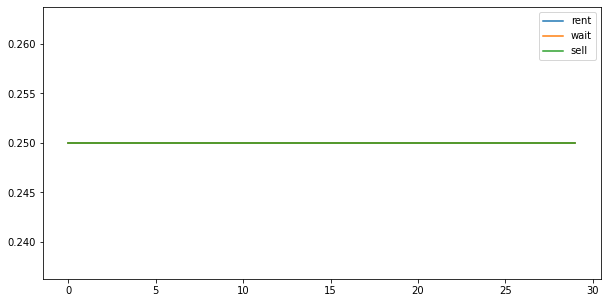

In [5]:
df__ = pd.DataFrame()
df__['p_rent'] = df_['rent_vs_sell'] * df_['rent_vs_wait']
df__['p_sell'] = df_['sell_vs_rent'] * df_['sell_vs_wait']
df__['p_wait'] = df_['wait_vs_rent'] * df_['wait_vs_sell']
df__['space'] = '__________'
df__['ror_rent'] = df['ror_rent']
df__['ror_sell'] = df['ror_sale']
df__['ror_wait'] = df['ror_wait']


plt.plot(df__['p_rent'], label='rent')
plt.plot(df__['p_wait'], label='wait')
plt.plot(df__['p_sell'], label='sell')
plt.legend()

In [6]:
df__.head(n=100)


p_rent  p_sell  p_wait       space  ror_rent  ror_sell  ror_wait
0     0.25    0.25    0.25  __________  0.564533  0.545333   0.53520
1     0.25    0.25    0.25  __________  0.568453  0.545333   0.53912
2     0.25    0.25    0.25  __________  0.572373  0.545333   0.54304
3     0.25    0.25    0.25  __________  0.576293  0.545333   0.54696
4     0.25    0.25    0.25  __________  0.580213  0.545333   0.55088
5     0.25    0.25    0.25  __________  0.584133  0.545333   0.55480
6     0.25    0.25    0.25  __________  0.588053  0.545333   0.55872
7     0.25    0.25    0.25  __________  0.591973  0.545333   0.56264
8     0.25    0.25    0.25  __________  0.595893  0.545333   0.56656
9     0.25    0.25    0.25  __________  0.599813  0.545333   0.57048
10    0.25    0.25    0.25  __________  0.603733  0.545333   0.57440
11    0.25    0.25    0.25  __________  0.607653  0.545333   0.57832
12    0.25    0.25    0.25  __________  0.611573  0.545333   0.58224
13    0.25    0.25    0.25  __________  0.615493  0.545333   0.58616
14    0.25    0.25    0.25  __________  0.619413  0.545333   0.59008
15    0.25    0.25    0.25  __________  0.623333  0.545333   0.59400
16    0.25    0.25    0.25  __________  0.627253  0.545333   0.59792
17    0.25    0.25    0.25  __________  0.631173  0.545333   0.60184
18    0.25    0.25    0.25  __________  0.635093  0.545333   0.60576
19    0.25    0.25    0.25  __________  0.639013  0.545333   0.60968
20    0.25    0.25    0.25  __________  0.642933  0.545333   0.61360
21    0.25    0.25    0.25  __________  0.646853  0.545333   0.61752
22    0.25    0.25    0.25  __________  0.650773  0.545333   0.62144
23    0.25    0.25    0.25  __________  0.654693  0.545333   0.62536
24    0.25    0.25    0.25  __________  0.658613  0.545333   0.62928
25    0.25    0.25    0.25  __________  0.662533  0.545333   0.63320
26    0.25    0.25    0.25  __________  0.666453  0.545333   0.63712
27    0.25    0.25    0.25  __________  0.670373  0.545333   0.64104
28    0.25    0.25    0.25  __________  0.674293  0.545333   0.64496
29    0.25    0.25    0.25  __________  0.678213  0.545333   0.64888

In [7]:
import random

wait_vs_sell = random.choices(['wait', 'sell'], weights=[0.674952, 1-0.674952])
print(wait_vs_sell)

wait_vs_rent = random.choices(['wait', 'rent'], weights=[1-0.572812, 0.572812])
print(wait_vs_rent)


['wait']
['rent']
